In [4]:
%matplotlib inline
#Amitava Chakraborty - 11th Jan 2018
#Preliminaries
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, IBMQ
from qiskit.circuit import Gate, Parameter
from qiskit.exceptions import QiskitError
from qiskit.test import QiskitTestCase, Path
from qiskit.transpiler.passes import Unroller
from qiskit.converters.circuit_to_dag import circuit_to_dag
# Loading your IBM Q account(s)
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-06-10 14:45:09,124: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

# Load from a QASM File

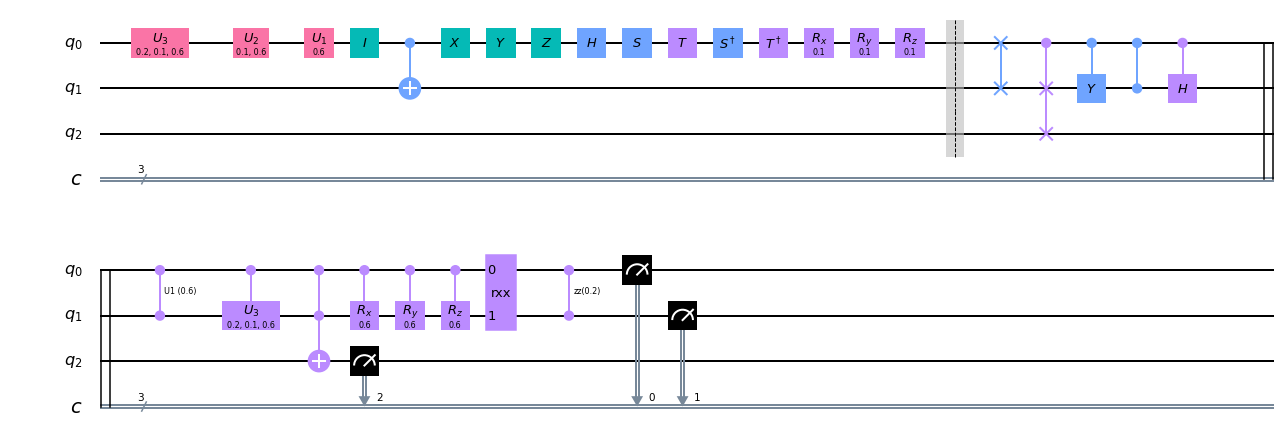

In [2]:
qasm_file = 'allGates.qasm'
qc = QuantumCircuit.from_qasm_file(qasm_file)
qc.draw('mpl')

# Write QASM

In [6]:
from qiskit.quantum_info import random_unitary
qr1 = QuantumRegister(1, 'qr1')
qr2 = QuantumRegister(2, 'qr2')
cr = ClassicalRegister(3, 'cr')
qc = QuantumCircuit(qr1, qr2, cr)
qc.u1(0.3, qr1[0])
qc.u2(0.2, 0.1, qr2[0])
qc.u3(0.3, 0.2, 0.1, qr2[1])
qc.s(qr2[1])
qc.sdg(qr2[1])
qc.cx(qr1[0], qr2[1])
qc.barrier(qr2)
qc.cx(qr2[1], qr1[0])
qc.h(qr2[1])
qc.x(qr2[1]).c_if(cr, 0)
qc.y(qr1[0]).c_if(cr, 1)
qc.z(qr1[0]).c_if(cr, 2)
qc.barrier(qr1, qr2)
qc.measure(qr1[0], cr[0])
qc.measure(qr2[0], cr[1])
qc.measure(qr2[1], cr[2])

qasm = qc.qasm() 
print(qasm)

OPENQASM 2.0;
include "qelib1.inc";
qreg qr1[1];
qreg qr2[2];
creg cr[3];
u1(0.3) qr1[0];
u2(0.2,0.1) qr2[0];
u3(0.3,0.2,0.1) qr2[1];
s qr2[1];
sdg qr2[1];
cx qr1[0],qr2[1];
barrier qr2[0],qr2[1];
cx qr2[1],qr1[0];
h qr2[1];
if(cr==0) x qr2[1];
if(cr==1) y qr1[0];
if(cr==2) z qr1[0];
barrier qr1[0],qr2[0],qr2[1];
measure qr1[0] -> cr[0];
measure qr2[0] -> cr[1];
measure qr2[1] -> cr[2];



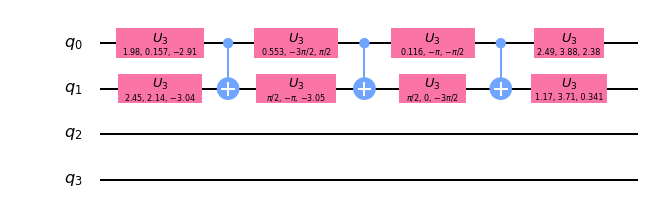

In [7]:
# circuit qasm() method with pi params.
qc = QuantumCircuit(4)
qc.append(random_unitary(4, seed=1234), [0, 1])
qc = qc.decompose()
qasm_str = qc.qasm()
qc2 = QuantumCircuit.from_qasm_str(qasm_str)
qc2.draw('mpl')